## Stats507 Homework 8, April 3, 2019
### Israel Diego  [(Go to Home Page)](https://israeldi.github.io/Stats507/) 
#### israeldi@umich.edu

This notebook shows solutions to homework 8 for Stats507

## Table of Contents

1. [Problem 1: counting words with mrjob](#Problem-1:-counting-words-with-mrjob)
2. [Problem 2: Computing Sample Statistics with mrjob](#Problem-2:-Computing-Sample-Statistics-with-mrjob)
3. [Problem 3: Graph Processing: Counting Triangles with PySpark](#Problem-3:-Graph-Processing:-Counting-Triangles-with-PySpark)

### Problem 1: counting words with mrjob
#### Time Spent: 3 hours
#### ([Back to Top](#Table-of-Contents))
In this problem, you'll get a gentle introduction to `mrjob` and running `mrjob` on the Fladoop cluster. I have uploaded a large text file to the Fladoop cluster. Your job is to count how many times each word occurs in this file.
1. Write an `mrjob` job that takes text as input and counts how many times each word occurs in the text. Your script should strip punctuation like full stops, commas and semicolons, but you may treat hyphens, apostrophes, etc. as you wish. Simplest is to treat, e.g., "John's" as two words, "John" and "s", but feel free to do more complicated processing if you wish. Your script should ignore case, so that "Cat" and "cat" are considered the same word. Your output should be a collection of (word,count) pairs. Please save your script in a file called `mr_word_count.py` and include it in your submission.

2. To test your code, I have uploaded a simple text file to the course webpage:
[http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/simple.txt](http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/simple.txt)
Download this file and test your code either on your local machine or on the Fladoop grid. The file is small enough that you should be able to check by hand whether your code is behaving correctly. Save the output of running your script on this small file to a file called `simple_word_counts.txt` and include it in your submission. **Note:** use the redirect arrow > to send the Hadoop output to a file. This will only send the `stdout` output to the file, while still printing the Hadoop error/status messages to the terminal.

3. Once you are confident in the correctness of your program, run your mrjob script on the file
[hdfs:/var/stat507w19/darwin.txt](hdfs:/var/stat507w19/darwin.txt)
on the Fladoop grid (this file is the Project Gutenberg plain text version of Charles Darwin's scientific work *On the Origin of Species*). Note that this file is on `hdfs`, not the local file system, so you'll have to run your script accordingly. Save the output to a file called `darwin_word_counts.txt`, and include it in your submission.

4. Zipf's law states, roughly, that if one plots word frequency against frequency rank (i.e., most frequent word, second most frequent word, etc.), the resulting line is (approximately) linear on a log-log scale. Using the information in `darwin_word_counts.txt`, make a plot of word frequency as a function of word rank on a log-log scale for all words in the file
[hdfs:/var/stats507w19/darwin.txt](hdfs:/var/stats507w19/darwin.txt)
Give an appropriate title to your plot and include axis labels. Save the plot as a pdf file called `zipf.pdf`, and include it in your submission.

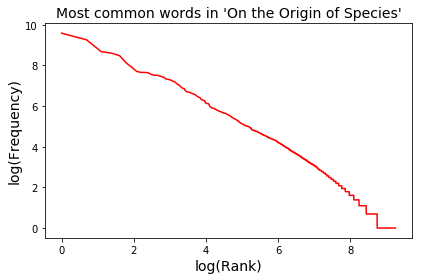

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import math
import pandas as pd

file = "darwin_word_counts.txt"

data = []
rank = 1
with open(file) as f:
    # Extract input from file
    for line in f:
        word, freq = line.split()
        freq = int(freq)
        data.append([word, freq])
    
# Sort the Data by frequency, highest to lowest
data = sorted(data, key = lambda x: int(x[1]), reverse = True)

# Add rank to sorted data
for i in range(len(data)):
    data[i].insert(0, i + 1)
    
# Convert to dataframe to access columns easily
data = pd.DataFrame(data, columns = ["rank", "word", "frequency"])

# Plot our figure and save plot
f = plt.figure()
plt.plot(data["rank"].apply(math.log), data["frequency"].apply(math.log), 'r')
plt.title("Most common words in 'On the Origin of Species'", fontsize = 14)
plt.xlabel('log(Rank)', fontsize = 14)
plt.ylabel('log(Frequency)', fontsize = 14)
_ = plt.tight_layout()

f.savefig("zipf.pdf", bbox_inches='tight')

5. How "Zipfian" does the resulting plot look (It suffices for you to state whether or not your plot looks approximately like a line)? You can read more about Zipf's law and about power laws generally at the respective Wikipedia pages (https://en.wikipedia.org/wiki/Zipf's_law, https://en.wikipedia.org/wiki/Power_law). For more about power laws, I recommend this survey paper by Mark Newman, a faculty member here at University of Michigan https://arxiv.org/pdf/cond-mat/0412004.pdf.

- *It is safe to say that the plot from Problem 1.4 is linear.*

### Problem 2: Computing Sample Statistics with mrjob
#### Time Spent: 5 hours
#### ([Back to Top](#Table-of-Contents))
In this problem, we'll compile some very basic statistics summarizing a toy dataset. The file 

http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/populations_small.txt

contains a collection of (class,value) pairs, one per line, with each line taking the form `class_label, value`, where `class_label` is a nonnegative integer and `value` is a float. Each pair corresponds to an observation, with the class labels corresponding to different populations, and the values corresponding to some measured quantity.
1. Write a `mrjob` program called `mr_summary_stats.py` that takes as input a sequence of (label,value) pairs like in the file at http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/populations_small.txt, and outputs a collection of (label, number of samples, mean, variance) $4$-tuples, in which one $4$-tuple appears for each class label in the data, and the mean and variance are the sample mean and variance, respectively, of all the values for that class label. Thus, if $25$ unique class labels are present in the input then your program should output $25$ lines, one for each class label. **Note:** I don't care whether you use $n$ or $n-1$ in the denominator of your sample variance formula, just be clear which one you are using. **Note:** you don't need to do any special formatting of the Hadoop output. That is, your output is fine if it consists of lines of the form `label` `[number,mean,variance]` or similar.

Think carefully about what your key-value pairs should be here, as well as what your mappers, reducers, etc. should be. Should there be more than one step in your job? Sit down with pen and paper first! **Hint:** to compute the sample mean and sample variance of a collection of numbers, it suffices to know their sum, the sum of their squares, and the size of the collection.

Please include a copy of `mr_summary_stats.py` in your submission.

2. Download the small file at http://www-personal.umich.edu/~klevin/teaching/Winter2019/STATS507/populations_small.txt. Run your `mrjob` script on this file, either on your local machine or on Fladoop, and write the output to a file called `summary_small.txt`. Please include this file in your submission. Inspect your program's output and verify that it is behaving as expected.

3. I have uploaded to the Fladoop cluster a much larger data file, located on the HDFS file system at [hdfs:/var/stats507w19/populations_large.txt](hdfs:/var/stats507w19/populations_large.txt). Once you are *sure* that your script is doing what you want, run it on this file. Be sure to use the `-r hadoop` command to tell `mrjob` to run on the Hadoop server rather than on the login node. Save the output to a file called `summary_large.txt`. Download this file and include it in your submission. Please also include in your notebook file a copy-paste of your shell session on Fladoop in a markdown cell (i.e., a cell that will display as code but will not be executed by the interpreter).

4. Use `matplotlib` and the results in `summary_large.txt` to create a plot displaying $95\%$ confidence intervals for the sample means of the populations given by the class labels in file [hdfs:/var/stats507w19/populations_large.txt](hdfs:/var/stats507w19/populations_large.txt). You will probably want to make a boxplot for this, but feel free to get creative if you think you have a better way to display the information. Make sure your plot has a sensible title and axis labels. Save your plot as a pdf called `populations.pdf` and include it in your submission.

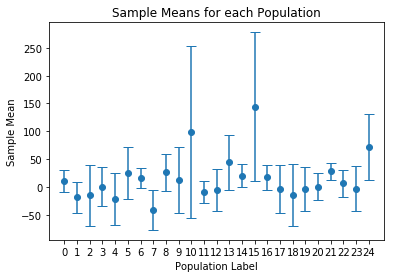

In [2]:
import pandas as pd
import matplotlib.pyplot as plt, numpy as np
%matplotlib inline

cols = ['n', 's_mean', 's_var']

# Read Data
df = pd.read_table('summary_large.txt', delim_whitespace = True, names = ('label', 'Stats'))
df

# Separate into separate columns from our Stats column
df['Stats'] = df['Stats'].apply(lambda x: pd.Series(str(x).replace('[', '')))
df['Stats'] = df['Stats'].apply(lambda x: pd.Series(str(x).replace(']', '')))
df[cols] = df['Stats'].apply(lambda x: pd.Series(str(x).split(',')))

# Convert columns to numeric
df[cols] = df[cols].apply(pd.to_numeric, errors = 'coerce', axis = 1)

# Sort by population labels
df = df.sort_values(by = ['label'])

# Set up Error bars for our plot
x_pos = np.arange(len(df))
error = ((df['s_var'] / df['n']).apply(np.sqrt))* 1.96

# Plot our Bar chart with 95% confidence bands
f = plt.figure()
plt.errorbar(x_pos, df['s_mean'], yerr = error, capsize = 5, fmt = 'o')
plt.title('Sample Means for each Population')
plt.ylabel('Sample Mean')
plt.xlabel('Population Label')
_=plt.xticks(x_pos, df['label'])


f.savefig("populations.pdf", bbox_inches='tight')

### Problem 3: Graph Processing: Counting Triangles with PySpark
#### Time Spent: 6 hours
#### ([Back to Top](#Table-of-Contents))

A classic task in graph processing is called "triangle counting". If you have never heard of graphs, that's okay! It suffices to know that a graph is a set of *nodes* (also called *vertices*), pairs of which are joined by *edges* (see https://en.wikipedia.org/wiki/Graph_theory for more). A *triangle* in graph theory is a set of three nodes, say $\{a, b, c\}$, such that all three nodes are joined by edges. Triangle counting is closely related to a fundamental task for social media companies, who may wish to suggest new "friends" to users based on their existing social network. In this problem, you'll implement triangle counting in the MapReduce framework using PySpark. We should note that in practice, the MapReduce framework is rather poorly-suited to the problem of counting triangles, but it's a good problem to get you practice with the framework, so we'll leave that be.

The input for this problem will be a collection of files representing users' friend lists in a social network. Each user in the network is assigned a numeric ID, and that user's friend list is contained in a file called `n.txt`, where `n` is the user's ID. Each such file contains a single space-separated line, of the form

`n f1 f2 ... fK`

where `n` is the node and `f1,f2,...,fK` are the IDs of the friends of `n`. So, if node $1$ is friends with nodes $2,5$ and $6$, there will be a file `1.txt`, containing only the line `1 2 5 6`. If node $10$ has no friends, then there will be a file `10.txt`, containing only the line `10`, or perhaps no file at all. Note that just because an ID appears in a friend list, that doesn't necessarily mean that there will be a file listing that user's friends, but you may assume (1) **symmetry:** if $100$ is a friend of $200$, then $200$ is a friend of $100$. (2) **no duplication**: each friend appears in a given friend list at most once (i.e., every file will contain a given number at most once).

Once again, before you dive in and write a bunch of code, sit down and think about the problem. What is the right "fundamental unit" of the problem? What should your keys and values look like? **Hint:** the simplest solution to this problem involves multiple steps, involving a standard map-reduce pattern and a subsequent filtering operation. As usual, overly complicated solutions will not receive full credit.
1. Write a PySpark job that takes the described input and produces a list of all the triangles in the network, one per line. Each triangle should be listed as a space-separated line `node1 node2 node3`, with the entries sorted numerically in ascending order. So, if nodes $2$, $5$ and $15$ form a triangle, the output should include the triple $(2,5,15)$, but not $(2,15,5)$, $(15,2,5)$, etc. Save your script in a file called `ps_fof.py` and include it in your submission.

2. Test your script on the set of 5 simple files in the HDFS directory
[hdfs:/var/stats507w19/fof/friends.simple](hdfs:/var/stats507w19/fof/friends.simple)
which is small enough that you should be able to work out by hand what the correct output is. How many triangles are there? List them in a file called `small_triangle_list.txt` and include it in your submission.

In [3]:
# Get number of triangles
df = pd.read_table('small_triangle_list.txt', delim_whitespace = True, header = None)
numTriangles = len(df)

print("Number of Triangles in Small List = ", numTriangles)

Number of Triangles in Small List =  6


3. Once you are confident that your script is correct, run it on the larger data set, stored on HDFS at [hdfs:/var/stats507w19/fof/friends1000](hdfs:/var/stats507w19/fof/friends1000) Save the list of triangles to a file called big `big_triangle_list.txt`, and include it in your submission. Don't forget to include in your notebook file a copy-paste of the commands you used to launch your job along with their outputs.

In [4]:
# Get number of triangles
df = pd.read_table('big_triangle_list.txt', delim_whitespace = True, header = None)
numTriangles = len(df)

print("Number of Triangles in Big List = ", numTriangles)

Number of Triangles in Big List =  144120
